# General Imports

In [1]:
import pandas as pd 
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import random 
import math
from sympy.solvers import solve
from sympy import Symbol
from sympy import *
%matplotlib inline

# Preliminary Calculations

In [2]:
#variables
flow_speed = 1          #m/s^2
gravity= 9.81           #m/s^2
y_water= 9.8            #kN/m
kinematic_viscosity = 0.000001 
RA_z= 400               #m
RB_z= 600               #m
hdist_AB= 117000        #m
vdist_AB=200            #m
max_allowed_head= 150   #m
min_allowed_head= 7.24  #m
pipe_roughness= 0.0005    #m
pump_cost = 10000000 #$/1m^3/s at 100m head
#Pipe Diameter(m) : Total Cost($/km)
pipe_diamter = [0.7,0.8,0.9,1.0,1.1,1.2,1.4]
pipe_cost = {0.7:38000,0.8:44000,0.9:50000,1.0:80000,1.1:120000,1.2:150000,1.4:180000} 


In [3]:
rough_over_diam = []
for i in pipe_diamter:
    rough_over_diam.append(pipe_roughness/i)
rough_over_diam

[0.0007142857142857144,
 0.000625,
 0.0005555555555555556,
 0.0005,
 0.00045454545454545455,
 0.0004166666666666667,
 0.0003571428571428572]

actual_dist_AB:  444100.860139608
para_eq -5.93498904309715e-9*x**2 + 0.00309009009009009*x + 398.0
intg_eq_pt1 -1.18699780861943e-8*x + 0.00309009009009009
intg_eq (-1.18699780861943e-8*x + 1.00309009009009)**0.5


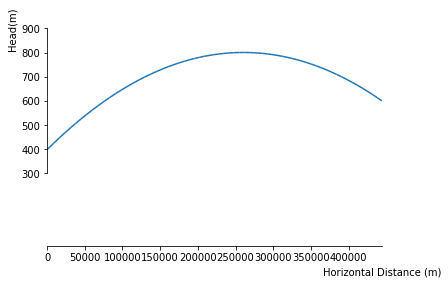

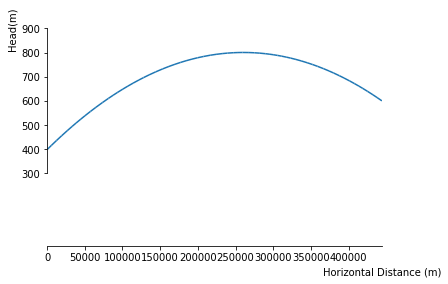

In [5]:
a,b,c = symbols('a b c')
para_sol = solve([Eq(c,398),Eq(a*444000**2+b*444000+c,600),Eq(a*(444000*0.6)**2 + b*(444000*0.6)+c,800)],[a,b,c])
x= symbols('x')
para_eq = para_sol[a]*x**2 + para_sol[b]*x + para_sol[c]
intg_eq_pt1 = diff(para_eq,x)
intg_eq = (1+intg_eq_pt1)**0.5
actual_dist_AB = integrate(intg_eq,(x,0,444000))
print('actual_dist_AB: ',actual_dist_AB)
print('para_eq',para_eq)
print('intg_eq_pt1',intg_eq_pt1)
print('intg_eq',intg_eq)
graph = plot(para_eq,(x,398,444000),ylabel='Head(m)',xlabel='Horizontal Distance (m)',xlim=(0,444000),ylim=(0,900))
graph.save('civil213.png')

actual_dist_AB:  117100.470194270
intg_eq_pt1 -1.70940170940171e-7*x + 0.0117264957264957
intg_eq (-1.70940170940171e-7*x + 1.0117264957265)**0.5
para_eq -8.54700854700855e-8*x**2 + 0.0117264957264957*x + 398.0


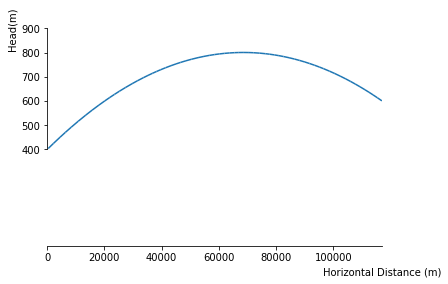

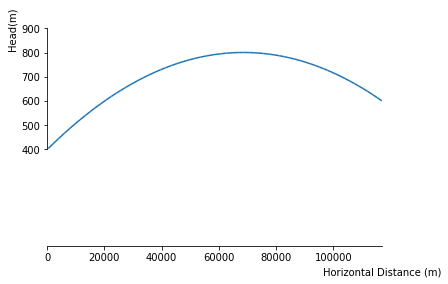

In [5]:
#FIND FIRST ORDER POLYNOMIAL 
#topogrophy between the two reservoirs can be approximaed as a parabolic with 
#maximum elevation of 800m reacher 60% of the pipline lenghth from A.
a,b,c = symbols('a b c')
para_sol = solve([Eq(c,398),Eq(a*117000**2+b*117000+c,600),Eq(a*(117000*0.6)**2 + b*(117000*0.6)+c,800)],[a,b,c])
x= symbols('x')
para_eq = para_sol[a]*x**2 + para_sol[b]*x + para_sol[c]
intg_eq_pt1 = diff(para_eq,x)
intg_eq = (1+intg_eq_pt1)**0.5
actual_dist_AB = integrate(intg_eq,(x,0,117000))
print('actual_dist_AB: ',actual_dist_AB)
print('intg_eq_pt1',intg_eq_pt1)
print('intg_eq',intg_eq)
print('para_eq', para_eq)

graph = plot(para_eq,(x,398,117000),ylabel='Head(m)',xlabel='Horizontal Distance (m)',xlim=(0,117000),ylim=(0,900))
graph.save('civil213.png')

In [15]:
#error calcs 
error = ((actual_dist_AB - hdist_AB)/actual_dist_AB)*100
error

0.0857982842453346

In [ ]:
#error is not too large, and since python is used we will just assume the actual
#distance and use the polynomial equation.

In [24]:
x_ranges= range(0,117100,100)

len(x_ranges)

1171

In [26]:
f = lambdify(x,para_eq,"numpy")

In [28]:
z=[]
for i in x_ranges:
    z.append(f(i))

In [29]:
z

[398.0,
 399.1717948717949,
 400.3418803418803,
 401.5102564102564,
 402.67692307692306,
 403.84188034188037,
 405.0051282051282,
 406.16666666666663,
 407.3264957264957,
 408.4846153846153,
 409.64102564102564,
 410.7957264957265,
 411.9487179487179,
 413.09999999999997,
 414.2495726495726,
 415.39743589743586,
 416.5435897435897,
 417.6880341880342,
 418.8307692307692,
 419.9717948717948,
 421.11111111111103,
 422.2487179487179,
 423.3846153846153,
 424.5188034188034,
 425.651282051282,
 426.7820512820512,
 427.91111111111104,
 429.03846153846143,
 430.16410256410245,
 431.2880341880341,
 432.41025641025635,
 433.5307692307692,
 434.6495726495726,
 435.7666666666666,
 436.8820512820512,
 437.9957264957264,
 439.1076923076922,
 440.2179487179486,
 441.32649572649564,
 442.4333333333332,
 443.53846153846143,
 444.6418803418802,
 445.7435897435896,
 446.8435897435896,
 447.9418803418802,
 449.03846153846143,
 450.1333333333332,
 451.2264957264956,
 452.3179487179486,
 453.40769230769223

In [31]:
v= []
for i in pipe_diamter:
    v.append((4*flow_speed)/(math.pi*i**2))
v

[2.5984480504799246,
 1.9894367886486917,
 1.5719006725125464,
 1.2732395447351628,
 1.0522640865579855,
 0.8841941282883075,
 0.6496120126199811]

In [41]:
re = []
for i in range(len(v)):
    re.append((v[i]*pipe_diamter[i])/kinematic_viscosity)
re

[1818913.6353359472,
 1591549.4309189536,
 1414710.6052612918,
 1273239.5447351628,
 1157490.4952137843,
 1061032.953945969,
 909456.8176679736]

In [46]:
vh =[]
for i in range(len(v)):
    vh.append((v[i]**2)/(2*gravity))
vh

[0.34413518201034254,
 0.20172572558760546,
 0.125936377382538,
 0.0826268572006832,
 0.056435255242594885,
 0.039847056906193674,
 0.02150844887564641]

In [47]:
d= {'Pipe Diamter (m)': pipe_diamter,'Velocity (m/s^2)': v,'Velocity Head (m)':vh ,'Re':re, 'e/D':rough_over_diam} 
preliminary_data = DataFrame(data=d)

In [48]:
preliminary_data

,Pipe Diamter (m),Velocity (m/s^2),Velocity Head (m),Re,e/D
0,0.7,2.598448,0.344135,1.818914e+06,0.000714
1,0.8,1.989437,0.201726,1.591549e+06,0.000625
2,0.9,1.571901,0.125936,1.414711e+06,0.000556
3,1.0,1.273240,0.082627,1.273240e+06,0.000500
4,1.1,1.052264,0.056435,1.157490e+06,0.000455
5,1.2,0.884194,0.039847,1.061033e+06,0.000417
6,1.4,0.649612,0.021508,9.094568e+05,0.000357


In [49]:
#Find f's and place here
f_fac = [0.019987, 0.017845,0.017442,0.017103, 0.016824,0.016585,0.016207 ]
preliminary_data['Friction Factor']= f_fac

In [50]:
preliminary_data

,Pipe Diamter (m),Velocity (m/s^2),Velocity Head (m),Re,e/D,Friction Factor
0,0.7,2.598448,0.344135,1.818914e+06,0.000714,0.019987
1,0.8,1.989437,0.201726,1.591549e+06,0.000625,0.017845
2,0.9,1.571901,0.125936,1.414711e+06,0.000556,0.017442
3,1.0,1.273240,0.082627,1.273240e+06,0.000500,0.017103
4,1.1,1.052264,0.056435,1.157490e+06,0.000455,0.016824
5,1.2,0.884194,0.039847,1.061033e+06,0.000417,0.016585
6,1.4,0.649612,0.021508,9.094568e+05,0.000357,0.016207


In [51]:
hl = []
for i in range(len(v)):
    hl.append((f_fac[i]*(117000/pipe_diamter[i]))*vh[i])
preliminary_data['Head loss (m)']= hl
preliminary_data

,Pipe Diamter (m),Velocity (m/s^2),Velocity Head (m),Re,e/D,Friction Factor,Head loss
0,0.7,2.598448,0.344135,1.818914e+06,0.000714,0.019987,1149.646995
1,0.8,1.989437,0.201726,1.591549e+06,0.000625,0.017845,526.470103
2,0.9,1.571901,0.125936,1.414711e+06,0.000556,0.017442,285.555698
3,1.0,1.273240,0.082627,1.273240e+06,0.000500,0.017103,165.340555
4,1.1,1.052264,0.056435,1.157490e+06,0.000455,0.016824,100.988734
5,1.2,0.884194,0.039847,1.061033e+06,0.000417,0.016585,64.434185
6,1.4,0.649612,0.021508,9.094568e+05,0.000357,0.016207,29.131950


In [53]:
hlm= []
for i in range(len(v)):
    hlm.append((hl[i]*100)/117000)
preliminary_data['Head loss per 100m (m)']=hlm
preliminary_data

,Pipe Diamter (m),Velocity (m/s^2),Velocity Head (m),Re,e/D,Friction Factor,Head loss,Head loss per 100m (m)
0,0.7,2.598448,0.344135,1.818914e+06,0.000714,0.019987,1149.646995,0.982604
1,0.8,1.989437,0.201726,1.591549e+06,0.000625,0.017845,526.470103,0.449974
2,0.9,1.571901,0.125936,1.414711e+06,0.000556,0.017442,285.555698,0.244065
3,1.0,1.273240,0.082627,1.273240e+06,0.000500,0.017103,165.340555,0.141317
4,1.1,1.052264,0.056435,1.157490e+06,0.000455,0.016824,100.988734,0.086315
5,1.2,0.884194,0.039847,1.061033e+06,0.000417,0.016585,64.434185,0.055072
6,1.4,0.649612,0.021508,9.094568e+05,0.000357,0.016207,29.131950,0.024899


In [60]:
dic = {'X-ranges': x_ranges,'Z-ranges': z}
main_computation= DataFrame(data=dic)
elev_change = [0]
for i in range(len(z)):
    if i ==0:
        continue
    elev_change.append(z[i]-z[i-1])

main_computation['Elevation Change']= elev_change

minu = []
maxu = []
for i in z:
    minu.append(i-7.24)
    maxu.append(i+150)

In [57]:
main_computation

,X-ranges,Z-ranges,Elevation Change
0,0,398.000000,0.000000
1,100,399.171795,1.171795
2,200,400.341880,1.170085
3,300,401.510256,1.168376
4,400,402.676923,1.166667
5,500,403.841880,1.164957
6,600,405.005128,1.163248
7,700,406.166667,1.161538
8,800,407.326496,1.159829
9,900,408.484615,1.158120


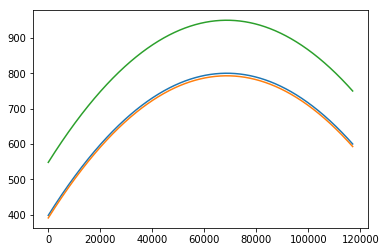

In [62]:
xlol = range(0,117100,100)
plt.plot([i for i in xlol],z)
plt.plot([i for i in xlol],minu)
plt.plot([i for i in xlol],maxu)

In [ ]:
#optimization
def make_calculation(main_contribution):
    for i in range(len(z)):
        
    